# 0. Data Pre-Processing and EDA

Overview:
- This notebook will perform image pre-processing and EDA to ensure standard inputs to the eventual machine learning classifiers
- The process will include the following:
    - Size and Channels standardization
    - Normalization of all images
    - Ensuring all images are of the same data-type

### 0. Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import cv2 as cv
from utils import *
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### 1. Setup Data Paths, Load Data, Pre-Process Images

In [3]:
# Setup Data Paths
cwd = os.getcwd()
data_path = os.path.join(cwd,'data')
training_path = os.path.join(data_path,'Training')
testing_path = os.path.join(data_path,'Testing')

# Processed Image Paths
output_path = os.path.join(cwd,'data_processed')
if os.path.exists(output_path):
    pass
else:
    os.mkdir(output_path)

test_path_processed = os.path.join(output_path,'Testing')
if os.path.exists(test_path_processed):
    pass
else:
    os.mkdir(test_path_processed)


# Initialize Data Variables
X_train = [] # Read with OpenCV
X_train_raw = [] # Read with Matplotlib
X_train_names = []
X_train_processed = [] # Post Processed OpenCV Image
Y_train = []
train_img_shapes = []
train_img_shapes_raw = [] # Shapes of Matplotlib read Images
label_names = []

X_test = []
X_test_processed = []
X_test_names = []
Y_test = []


# Load in Training Images and Labels
for label in os.listdir(training_path):
    label_names.append(label)
    label_path = os.path.join(training_path,label)
    for image in os.listdir(label_path):
        X_train_names.append(image)
        image_path = os.path.join(label_path,image)
        img_array = cv.imread(image_path)
        img_array_raw = plt.imread(image_path)
        img_array_processed = preprocess_image(image_path)
        train_img_shapes.append(img_array.shape)
        train_img_shapes_raw.append(img_array_raw.shape)
        X_train.append(img_array)
        X_train_raw.append(img_array_raw)
        X_train_processed.append(img_array_processed)
        Y_train.append(label)

# Need Numpy Array for K Fold Split Later On
X_train_processed = np.array(X_train_processed)


# Load Testing Images and Labels
for label in os.listdir(testing_path):
    label_path = os.path.join(testing_path,label)
    for image in os.listdir(label_path):
        X_test_names.append(image)
        image_path = os.path.join(label_path,image)
        img_array = cv.imread(image_path)
        img_array_processed = preprocess_image(image_path)
        X_test.append(img_array)
        X_test_processed.append(img_array_processed)
        Y_test.append(label)

X_test_processed = np.array(X_test_processed)


rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
rescaled
r

### 2. Plot Distribution of Image Shapes and Classes Before Image Pre Processing

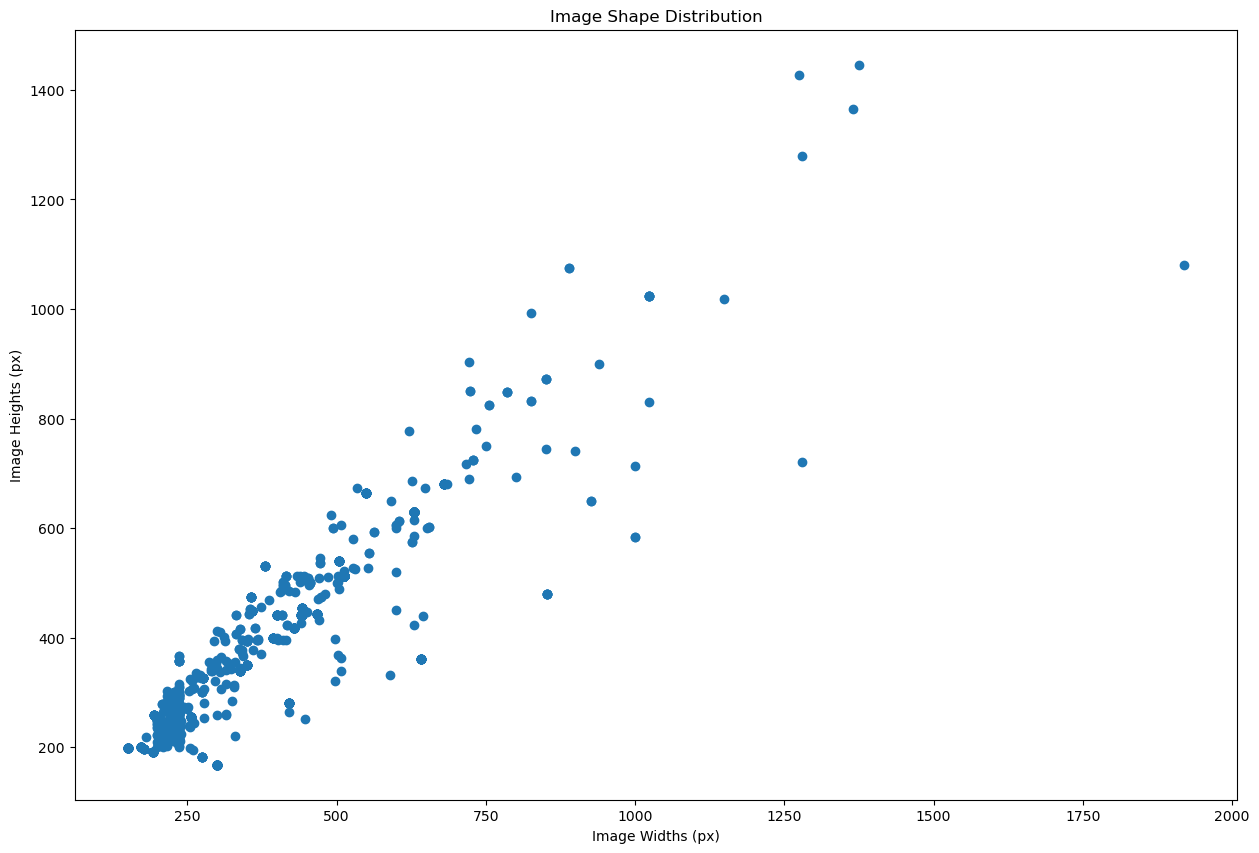

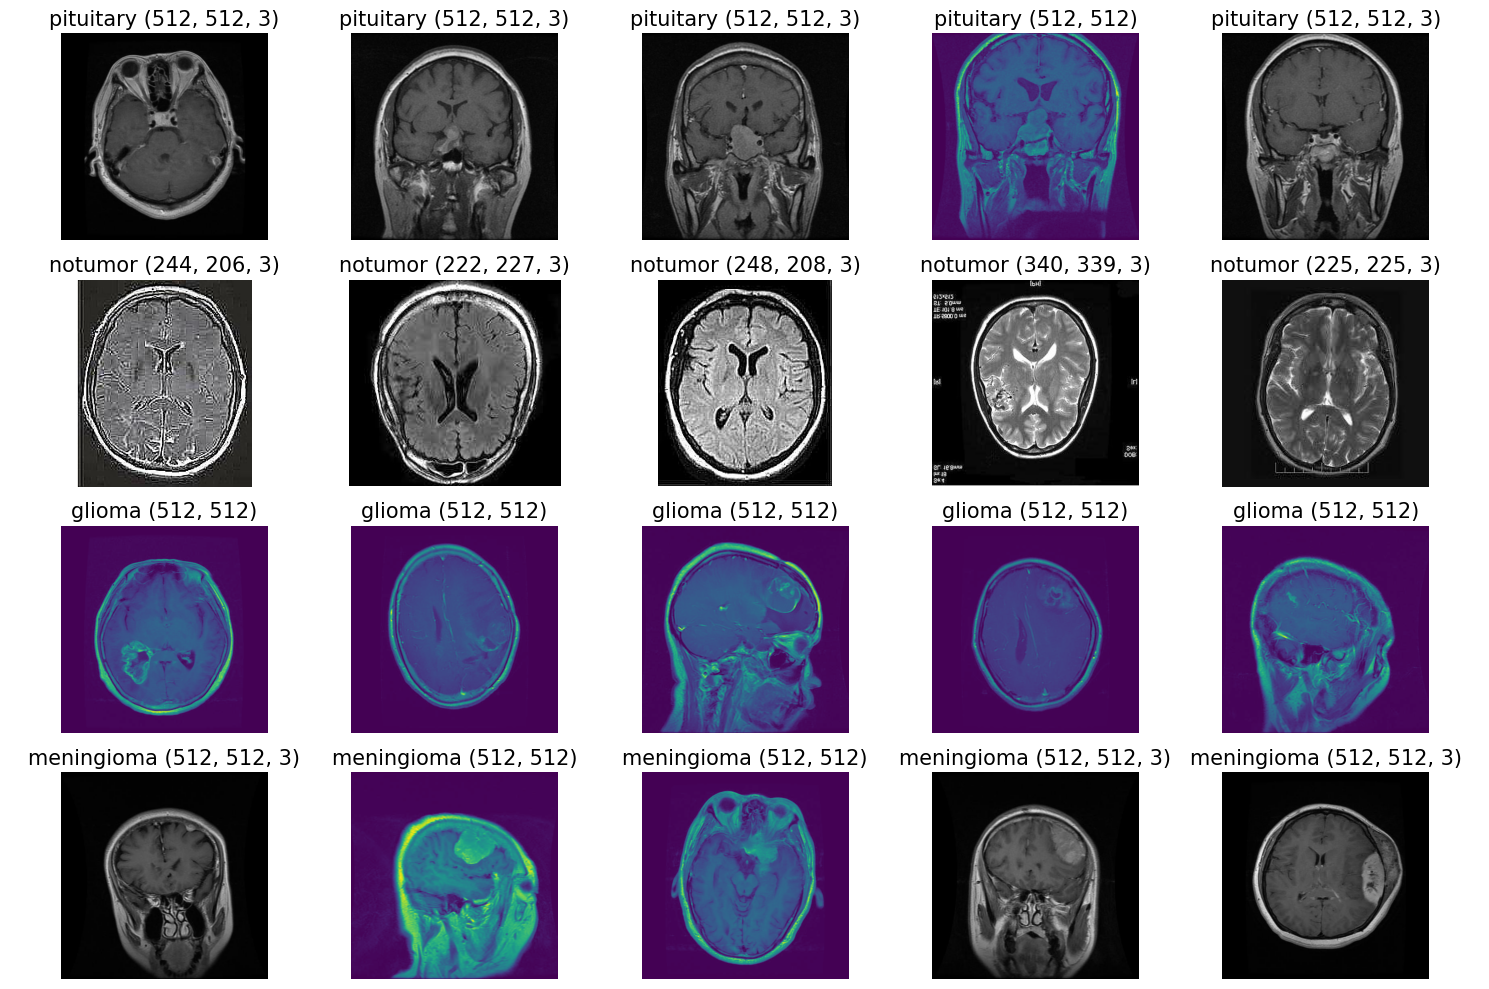

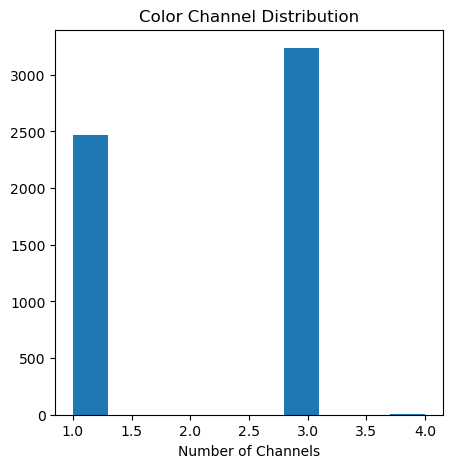

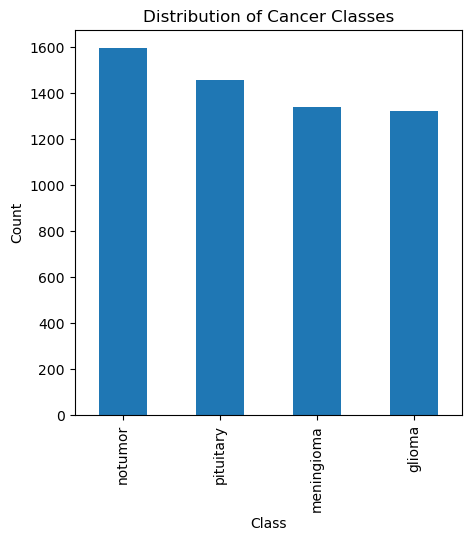

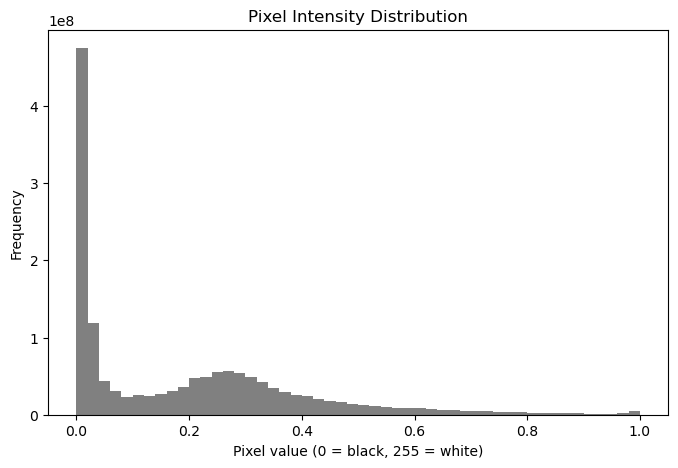

             count       mean        std        min        25%        50%  \
Label                                                                       
glioma      1321.0  32.711430   8.564805  13.692505  26.012524  31.559185   
meningioma  1339.0  43.482108  14.308397  18.228062  34.985043  40.824043   
notumor     1595.0  60.733665  21.245156   9.768337  44.079515  57.010736   
pituitary   1457.0  49.267893   8.223707  24.695900  44.082733  49.823555   

                  75%         max  
Label                              
glioma      38.592079   68.363167  
meningioma  46.878197  137.764303  
notumor     74.025510  125.144783  
pituitary   54.253468  102.333716  


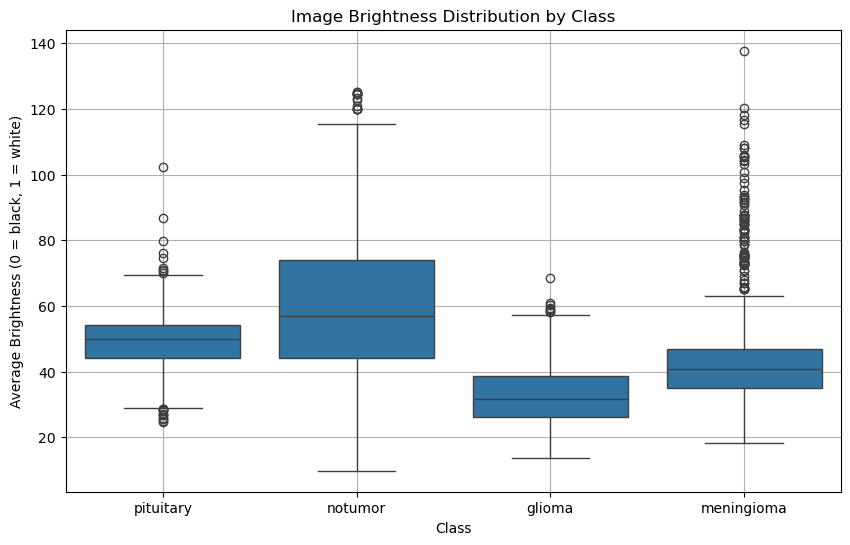

In [4]:
# Plot Distribution of Image Shapes
img_shape_widths = [img[1] for img in train_img_shapes]
img_shape_heights = [img[0] for img in train_img_shapes]
plt.figure(figsize=(15,10))
plt.scatter(img_shape_widths, img_shape_heights)
plt.title("Image Shape Distribution")
plt.xlabel("Image Widths (px)")
plt.ylabel("Image Heights (px)")
plt.show()


# Plot Example Images of Each Label before Pre Processing
plt.figure(figsize = (15,10))
plt.axis('off')
column_indexer = 0
while column_indexer < 20:
    for label in label_names:
        index_pos = [i for i, x in enumerate(Y_train) if x == label]
        for counter in range(0,5):
            image_index_value = index_pos[counter]
            plt.subplot(4,5,column_indexer+counter+1)
            plt.title(label +' ' + str(X_train_raw[image_index_value].shape), fontsize=15)
            plt.axis('off')
            plt.imshow(X_train_raw[image_index_value])
        column_indexer = column_indexer + 5
plt.tight_layout()
plt.show()

# Channel Distribution
channel_size = [shape[2] if len(shape) > 2 else 1 for shape in train_img_shapes_raw]
plt.figure(figsize = (5,5))
plt.hist(channel_size)
plt.title("Color Channel Distribution")
plt.xlabel("Number of Channels")

# Class Distribution
plt.figure(figsize=(5,5))
y_train_series = pd.Series(Y_train)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Pixel Intensity Distribution
plt.figure(figsize=(8, 5))
plt.hist(X_train_processed.flatten(), bins=50, color='gray')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value (0 = black, 255 = white)")
plt.ylabel("Frequency")
plt.show()

# Prepare a list of average brightness values per image
brightness_data = []

# Average pixel value of image
for i in range(len(X_train_processed)):
    brightness = np.mean(X_train[i])  
    label = Y_train[i]
    brightness_data.append((label, brightness))

# Convert to DataFrame
df_brightness = pd.DataFrame(brightness_data, columns=["Label", "Avg_Brightness"])

# Summary statistics
print(df_brightness.groupby("Label")["Avg_Brightness"].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_brightness, x="Label", y="Avg_Brightness")
plt.title("Image Brightness Distribution by Class")
plt.ylabel("Average Brightness (0 = black, 1 = white)")
plt.xlabel("Class")
plt.grid(True)
plt.show()


# X_flat = X_train_processed.reshape(len(X_train_processed), -1)
# pca = PCA(n_components=2)
# X_proj = pca.fit_transform(X_flat)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=Y_train, alpha=0.7)
# plt.title("PCA Projection of Images")
# plt.show()


X_flat = X_train_processed.reshape(len(X_train_processed), -1)


/var/folders/z1/g7jz3jw111z4d37prj1l1vr80000gn/T/ipykernel_46757/3397704130.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


ValueError: Calling nonzero on 0d arrays is not allowed. Use np.atleast_1d(scalar).nonzero() instead. If the context of this error is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.

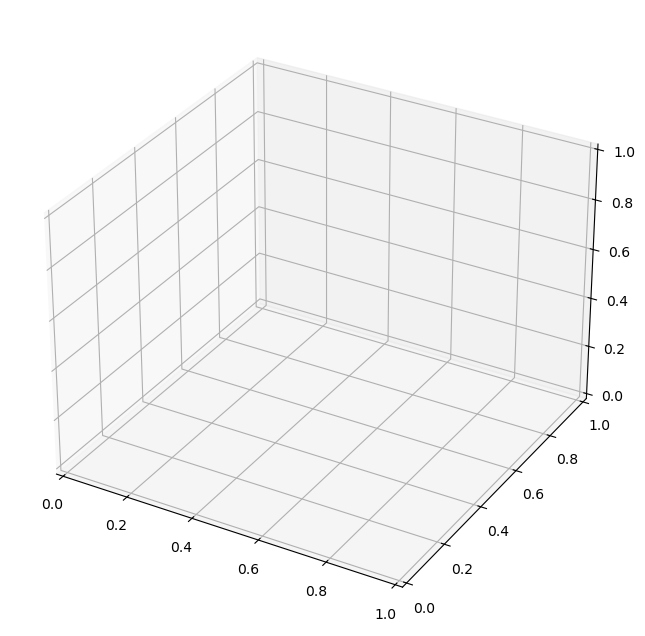

In [8]:
# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_flat)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign colors per label
unique_labels = np.unique(np.array(Y_train))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    idxs = np.where(Y_train == label)
    ax.scatter(X_pca_3d[idxs, 0], X_pca_3d[idxs, 1], X_pca_3d[idxs, 2],
               label=label, alpha=0.7, color=colors(i))

ax.set_title("3D PCA Projection of Images")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.tight_layout()
plt.show()

### 3. Output Pre Processed Images for Train and Test Sets
- Only use data from Training dataset to resize Testing set.
- Output K Folded Datasets to Respective Folders

In [ ]:
# Use mean Widths and Heights of Training Images to inform the standard resize resolution
mean_width = np.mean(img_shape_widths)
mean_height = np.mean(img_shape_heights)
median_width = np.median(img_shape_widths)
median_height = np.median(img_shape_heights)
print("Mean Image Width (px): " + str(mean_width))
print("Mean Image Height (px): " + str(mean_height))
print("Median Image Width (px): " + str(median_width))
print("Median Image Height (px): " + str(median_height))


# Train Dataset with K Fold Implementation (k=5) and output to Fold Folders
kf = KFold(n_splits = 5, shuffle=True, random_state=281)
for i,(train_index, val_index) in enumerate (kf.split(X_train_processed)):
    print("Processing Fold " + str(i))
    folder = os.path.join(output_path,'fold_' + str(i))
    if os.path.exists(folder):
        pass
    else:
        os.mkdir(folder)
        os.mkdir(os.path.join(folder,'Training'))
        os.mkdir(os.path.join(folder,'Validation'))
        

    # Assign Train/Val Based on New Indexes
    X_train_fold = [X_train_processed[i] for i in train_index]
    X_train_fold_names = [X_train_names[i] for i in train_index]
    Y_train_fold = [Y_train[i] for i in train_index] 

    X_val_fold = [X_train_processed[i] for i in val_index]
    X_val_fold_names = [X_train_names[i] for i in val_index]
    Y_val_fold = [Y_train[i] for i in val_index]

    # Create Label Folders for Each Fold
    for label in set(Y_train):
        try:
            os.mkdir(os.path.join(folder,'Training',label))
            os.mkdir(os.path.join(folder,'Validation',label))
        except:
            continue

    print("Writing Fold " + str(i) + " Training images")

    for index, img in enumerate(X_train_fold):
        img_output_path = str(os.path.join(output_path,folder,'Training',str(Y_train_fold[index]),str(X_train_fold_names[index])))
        plt.imsave(img_output_path, img, cmap='gray')
        
    print("Writing Fold " + str(i) + " Valdiation images")

    for index, img in enumerate(X_val_fold):
        img_output_path = os.path.join(output_path,folder,'Validation',str(Y_val_fold[index]),str(X_val_fold_names[index]))
        plt.imsave(img_output_path, img, cmap='gray')
    

# Create Label Folders for Test Set
for label in set(Y_train):
    try:
        os.mkdir(os.path.join(test_path_processed,label))
    except:
        continue

for index, img in enumerate(X_test_processed):
    img_output_path = os.path.join(test_path_processed,str(Y_test[index]),str(X_test_names[index]))
    plt.imsave(img_output_path, img,cmap='gray')
    

Mean Image Width (px): 451.563200280112
Mean Image Height (px): 453.8837535014006
Median Image Width (px): 512.0
Median Image Height (px): 512.0
Processing Fold 0
Writing Fold 0 Training images


[ WARN:0@669.082] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


Writing Fold 0 Valdiation images
Processing Fold 1
Writing Fold 1 Training images
Writing Fold 1 Valdiation images
Processing Fold 2
Writing Fold 2 Training images
Writing Fold 2 Valdiation images
Processing Fold 3
Writing Fold 3 Training images
Writing Fold 3 Valdiation images
Processing Fold 4
Writing Fold 4 Training images
Writing Fold 4 Valdiation images


### 4. Plotting Post Processed Images and Channel Distribution (Sanity Check)

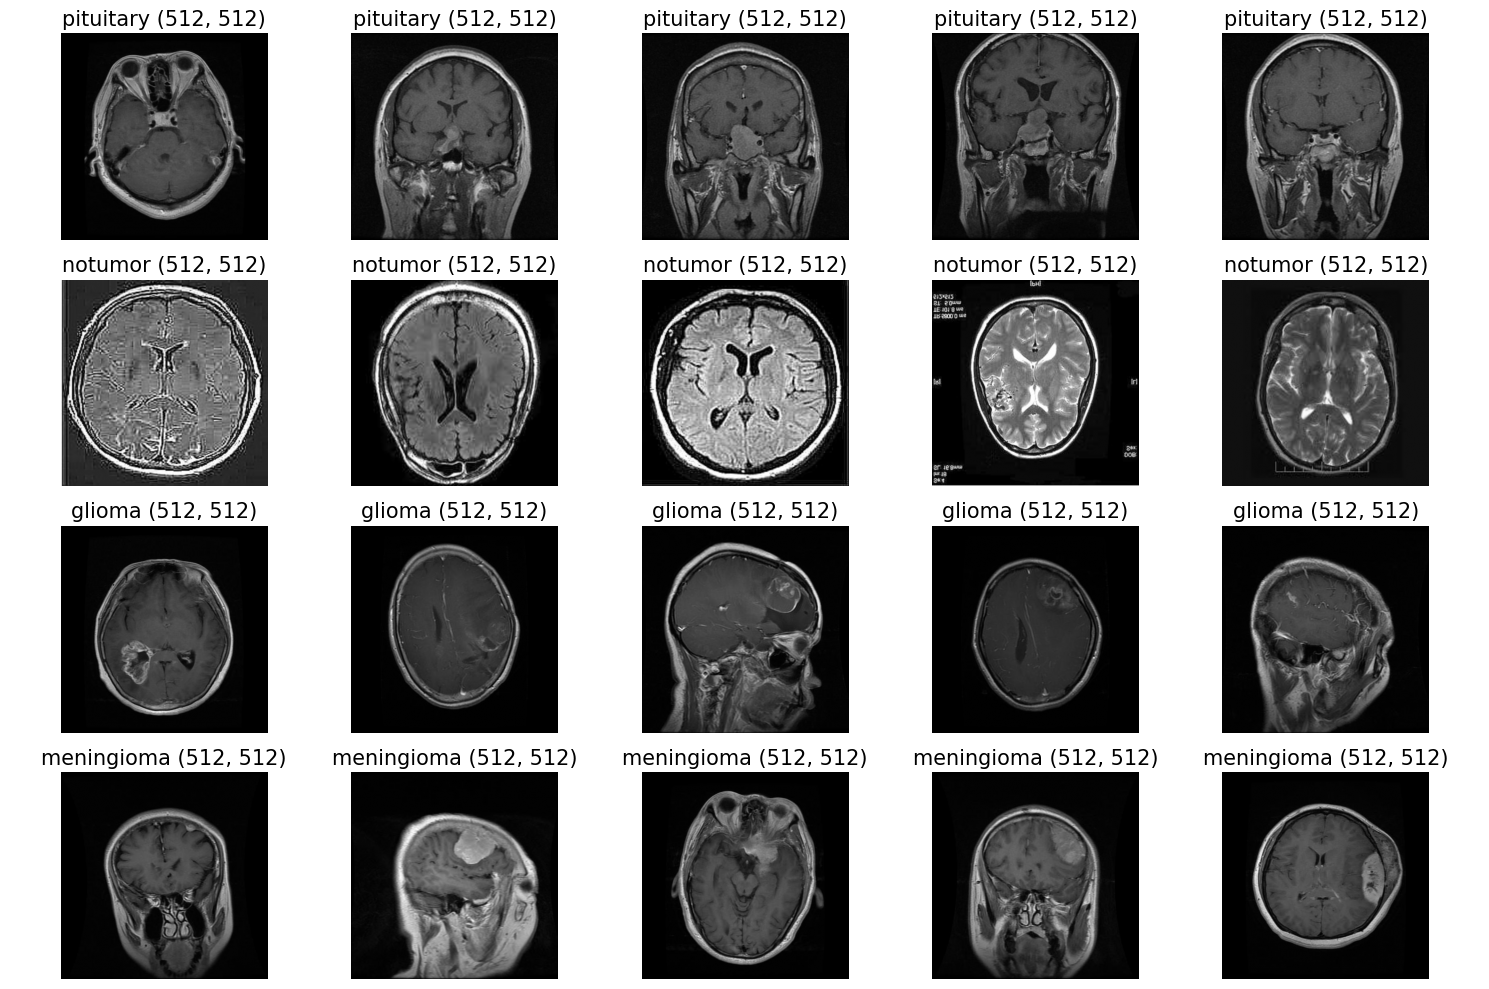

Text(0.5, 0, 'Number of Channels')

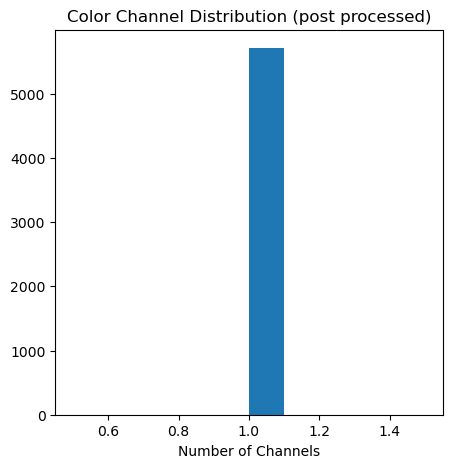

In [5]:
# Plot Example Images of Each Label before Pre Processing
plt.figure(figsize = (15,10))
plt.axis('off')
column_indexer = 0
while column_indexer < 20:
    for label in label_names:
        index_pos = [i for i, x in enumerate(Y_train) if x == label]
        for counter in range(0,5):
            image_index_value = index_pos[counter]
            plt.subplot(4,5,column_indexer+counter+1)
            plt.title(label +' ' + str(X_train_processed[image_index_value].shape), fontsize=15)
            plt.axis('off')
            plt.imshow(X_train_processed[image_index_value], cmap='gray')
        column_indexer = column_indexer + 5
plt.tight_layout()
plt.show()

# Channel Distribution
post_processed_img_shapes = [img.shape for img in X_train_processed]
channel_size = [shape[2] if len(shape) > 2 else 1 for shape in post_processed_img_shapes]
plt.figure(figsize = (5,5))
plt.hist(channel_size)
plt.title("Color Channel Distribution (post processed)")
plt.xlabel("Number of Channels")